<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Interactive optimization

.. codeauthor:: Emile Roux, Ludovic Charleux 

## Background

The starting point, also known as the initial guess or initial solution, is crucial in optimization because it can greatly impact the outcome of the optimization process. 
In optimization, the goal is to find the optimal solution that maximizes or minimizes a certain objective function.
If the initial guess is far from the optimal solution, it may take a long time for the algorithm to converge to the optimal solution, or it may converge to a suboptimal solution instead.
Therefore, selecting a good starting point that is close to the optimal solution can greatly improve the efficiency and accuracy of the optimization process. 

As alternative to over come this issue, global optimization algorithms can be used. The use of the [DIRECT](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.direct.html) algorithm presented here to illustarte the concept of global optimization.

The Goal of this notebook is to understand this keypoint of optimisation.





In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

import ipywidgets as ipw
from matplotlib import cm

## Definition of the cost function

The 2D Himmelblau cost function is used to illustrate the starting point importantce. 
https://en.wikipedia.org/wiki/Himmelblau%27s_function

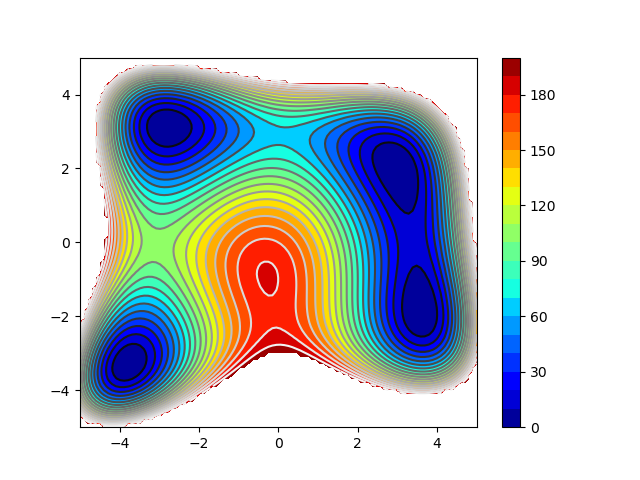

In [2]:
def cost(p):
    global counter, P
    """
    Himmelblau cost function.
    https://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    x, y = p
    return (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2


Nx, Ny = 100, 100
x = np.linspace(-5.0, 5.0, Nx)
y = np.linspace(-5.0, 5.0, Ny)
X, Y = np.meshgrid(x, y)
zf = np.array([X.flatten(), Y.flatten()])
Z = cost(zf).reshape(Nx, Ny)
Z = np.where(Z > 200.0, np.nan, Z)

plt.figure()
title = plt.title("")
plt.contourf(X, Y, Z, 20, cmap=cm.jet)
plt.colorbar()
plt.contour(X, Y, Z, 20, cmap=cm.gray)
plt.show()

This 2D function shows 4 different minima.

## Bluid a animated plot to have fun with starting points

interactive(children=(FloatSlider(value=0.0, description='x0', max=4.0, min=-4.0), FloatSlider(value=0.0, desc…

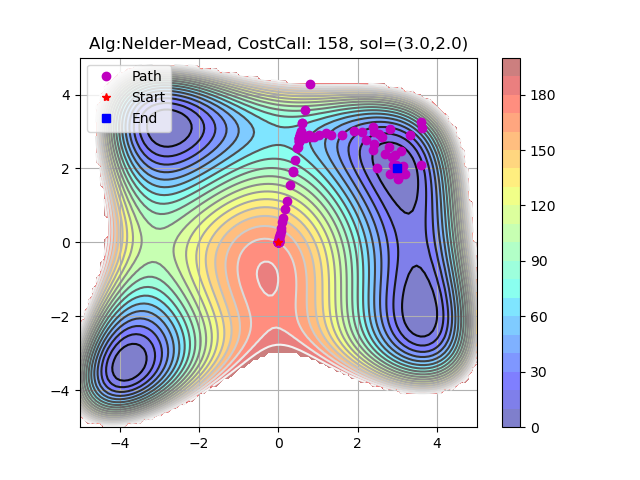

In [7]:
counter = 1
P = np.zeros((1000, 2))
P[0] = -1.0, 0.0


def cost_and_track(xk):
    global counter, P
    P[counter, :] = xk
    counter += 1
    return cost(xk)


plt.figure()
title = plt.title("")
plt.contourf(X, Y, Z, 20, cmap=cm.jet, alpha=0.5)
plt.colorbar()
plt.contour(X, Y, Z, 20, cmap=cm.gray)
(line,) = plt.plot(P[:, 0], P[:, 1], "om", label="Path")
(line0,) = plt.plot(P[:1, 0], P[:1, 1], "r*", label="Start")
(line1,) = plt.plot(
    P[counter - 1 : counter, 0], P[counter - 1 : counter, 1], "bs", label="End"
)
plt.grid()
plt.legend()
#plt.tight_layout()


@ipw.interact(
    x0=(-4.0, 4, 0.1),
    y0=(-4.0, 4, 0.1),
    algorithm=["Nelder-Mead", "BFGS", "Powell", "DIRECT"],
)
def run_optimization(x0=0.0, y0=0.0, algorithm="Nelder-Mead"):
    global P, counter, counterCostCall
    counter = 1
    P *= np.nan
    P[0] = x0, y0
    if algorithm == "DIRECT":
        bounds = optimize.Bounds([-6.0, -6.0], [6.0, 6.0])
        sol = optimize.direct(
            cost_and_track, bounds, f_min=-1.0, eps=1e-2, vol_tol=1e-10
        )
    else:
        sol = optimize.minimize(cost_and_track, [x0, y0], method=algorithm)
    line.set_xdata(P[:, 0])
    line.set_ydata(P[:, 1])
    line0.set_xdata(P[:1, 0])
    line0.set_ydata(P[:1, 1])
    line1.set_xdata(P[counter - 1 : counter, 0])
    line1.set_ydata(P[counter - 1 : counter, 1])
    title.set_text(
        "Alg:{0}, CostCall: {1}, sol=({2:.1f},{3:.1f})".format(
            algorithm, counter, sol.x[0], sol.x[1]
        )
    )

By changing the starting point and optimization method, we can observe:
* The optimization process converged toward different minimum.
* Number of iterations is not constant.